In [1]:
# import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.style.use('bmh')

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# for HD visualizations
%config InlineBackend.figure_format='retina'

# Suppress Scientific Notation in Numpy
np.set_printoptions(suppress=True)

# Suppress Scientific Notation in Pandas
pd.set_option('display.float_format', '{:.2f}'.format)

import scipy.stats as stats
from scipy.special import inv_boxcox

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# REGRESSION
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
# Classfication
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier

In [2]:
ch_df = pd.read_csv(r"C:\Data\churn_dataset.csv",skipinitialspace = True)

In [3]:
ch_df.info()
ch_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


(7043, 21)

In [4]:
ch_df.head()
ch_df.tail()
ch_df.describe()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.00,7043.00,7043.00,7032.00
mean,0.16,32.37,64.76,2283.30
std,0.37,24.56,30.09,2266.77
min,0.00,0.00,18.25,18.80
25%,0.00,9.00,35.50,401.45
50%,0.00,29.00,70.35,1397.47
75%,0.00,55.00,89.85,3794.74
max,1.00,72.00,118.75,8684.80


In [5]:
# check for duplicates
ch_df.duplicated().value_counts()

False    7043
dtype: int64

In [6]:
ch_df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
total_median = ch_df.TotalCharges.median()

In [8]:
ch_df.TotalCharges = ch_df.TotalCharges.fillna(total_median)

In [9]:
ch_df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
ch_df.skew()

SeniorCitizen     1.83
tenure            0.24
MonthlyCharges   -0.22
TotalCharges      0.96
dtype: float64

In [11]:
# Box Plot method for Person income
# Q1, Q2, Q3 = tuple(ch_df.SeniorCitizen.quantile(q = [0.25,0.5,0.75]).values)

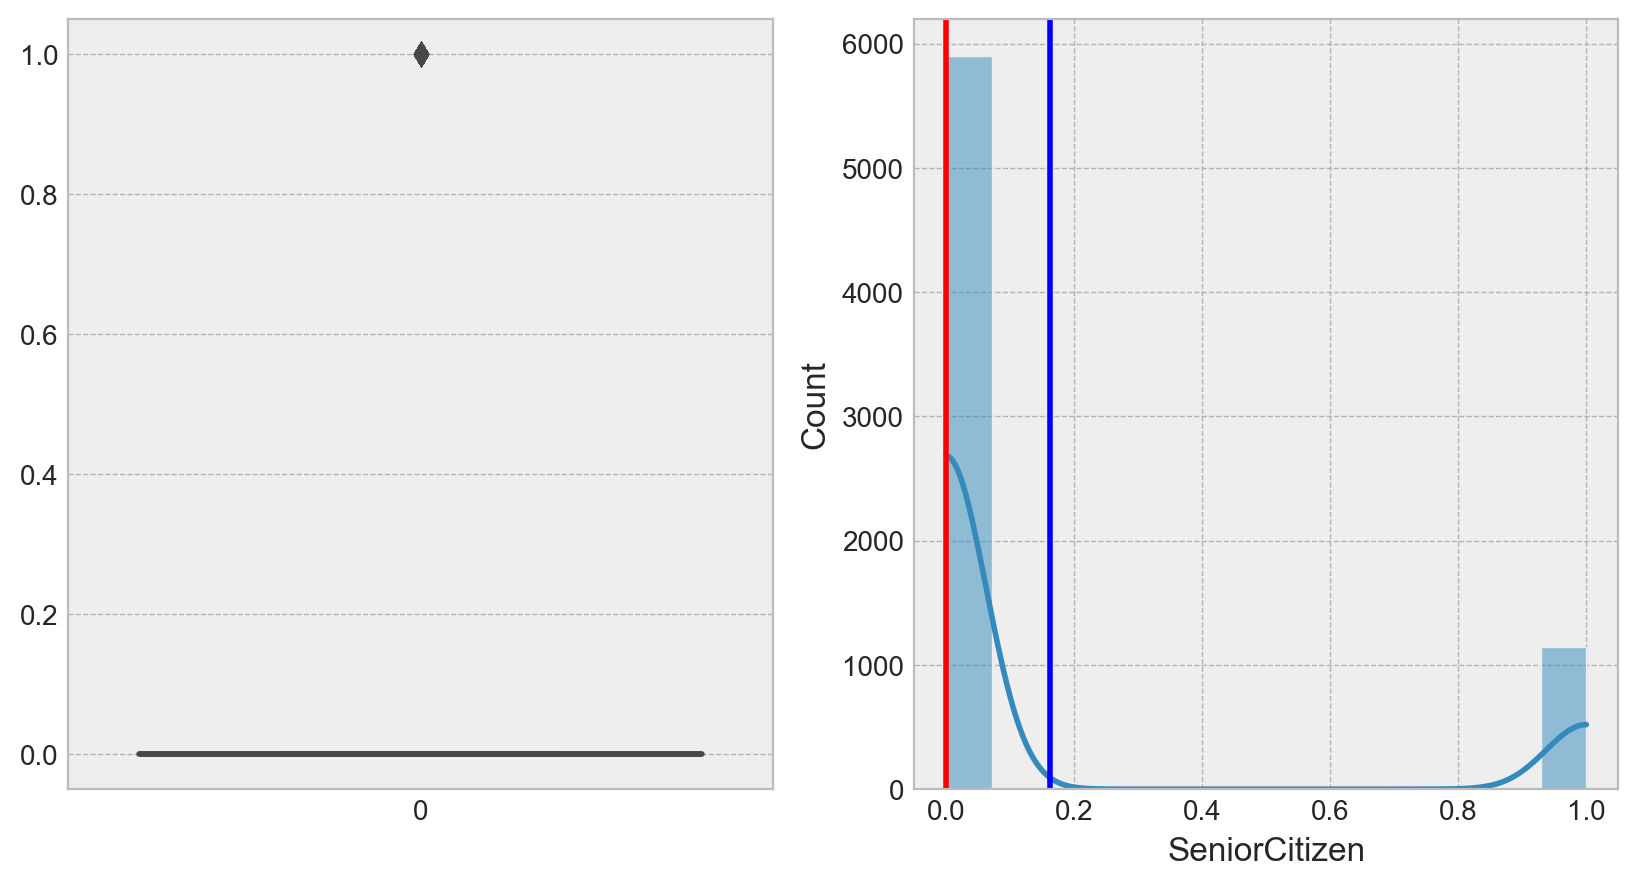

In [12]:
# sns.boxplot(ch_df.SeniorCitizen);
plt.figure(figsize=(10,5))

plt.subplot(121)
sns.boxplot(ch_df.SeniorCitizen);

plt.subplot(122)
sns.histplot(ch_df.SeniorCitizen, kde = True);
plt.axvline(ch_df.SeniorCitizen.mean(), color = 'blue');
plt.axvline(ch_df.SeniorCitizen.median(), color = 'red');

In [13]:
ch_df.head(4)
ch_df.duplicated().value_counts()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No


False    7043
dtype: int64

### Data Visulaization

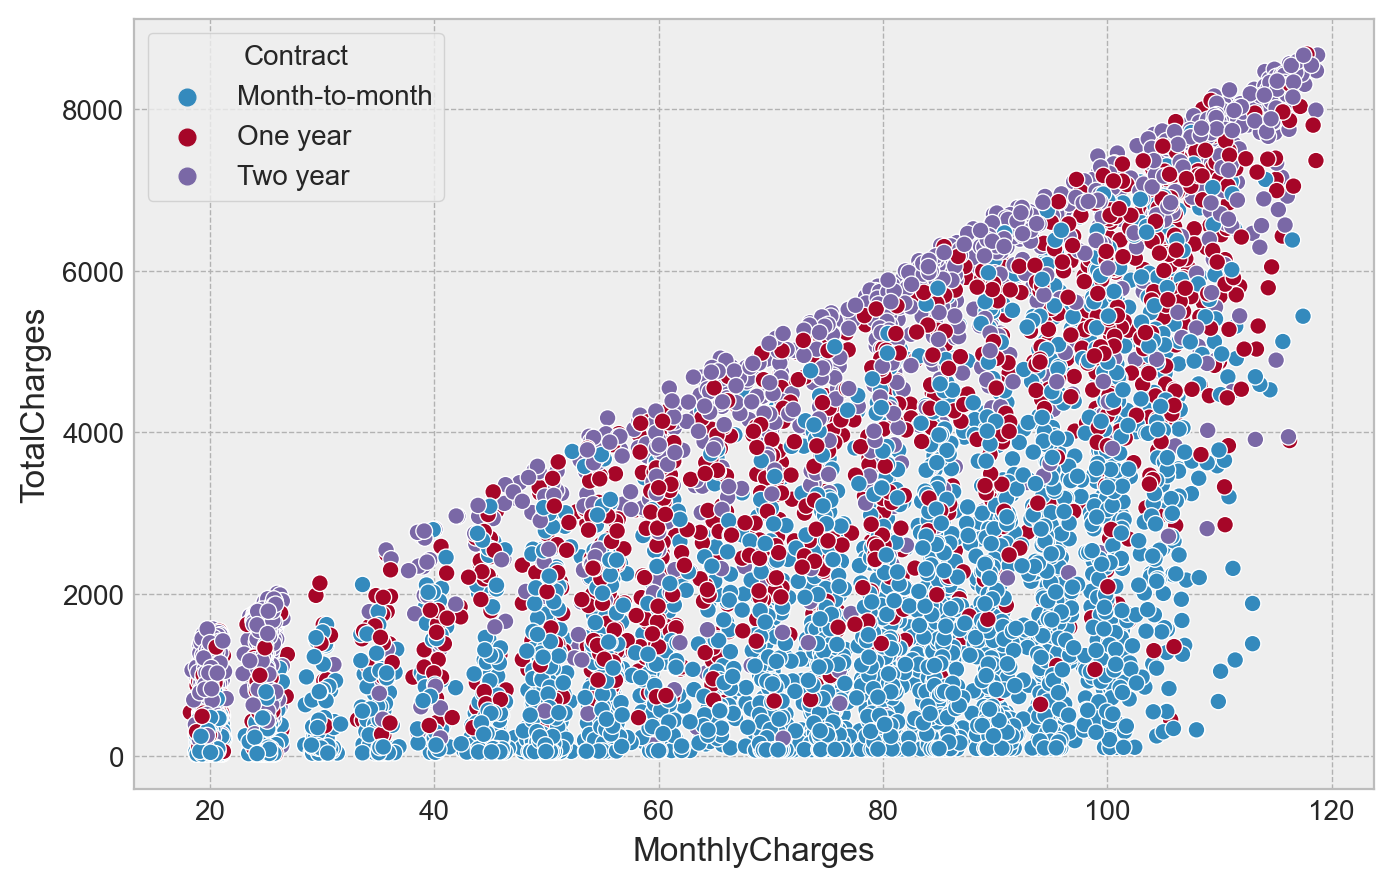

In [70]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=ch_df.MonthlyCharges,y=ch_df.TotalCharges, hue=ch_df.Contract);

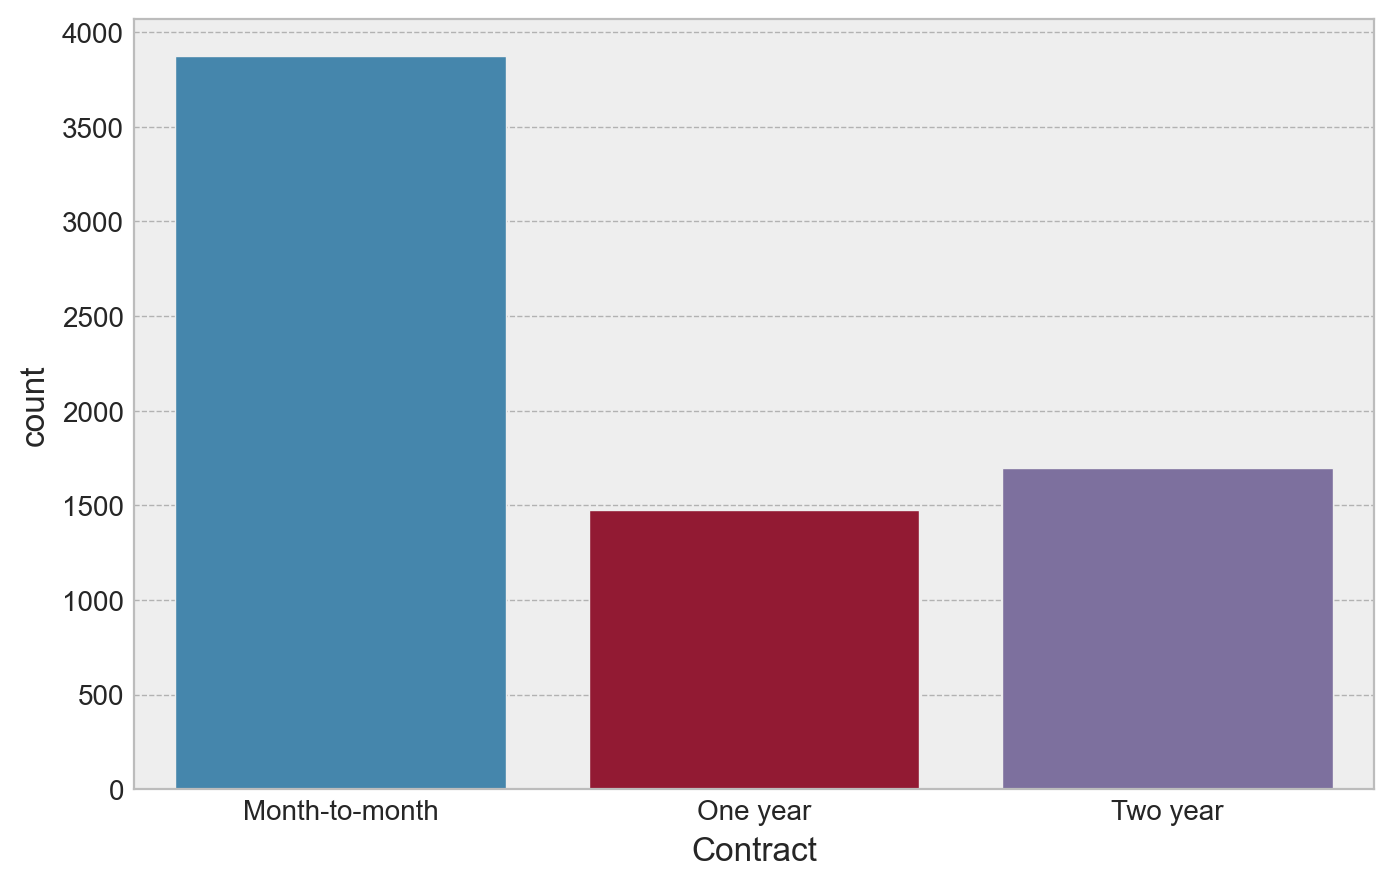

In [69]:
plt.figure(figsize=(8,5))
sns.countplot(x=ch_df.Contract);

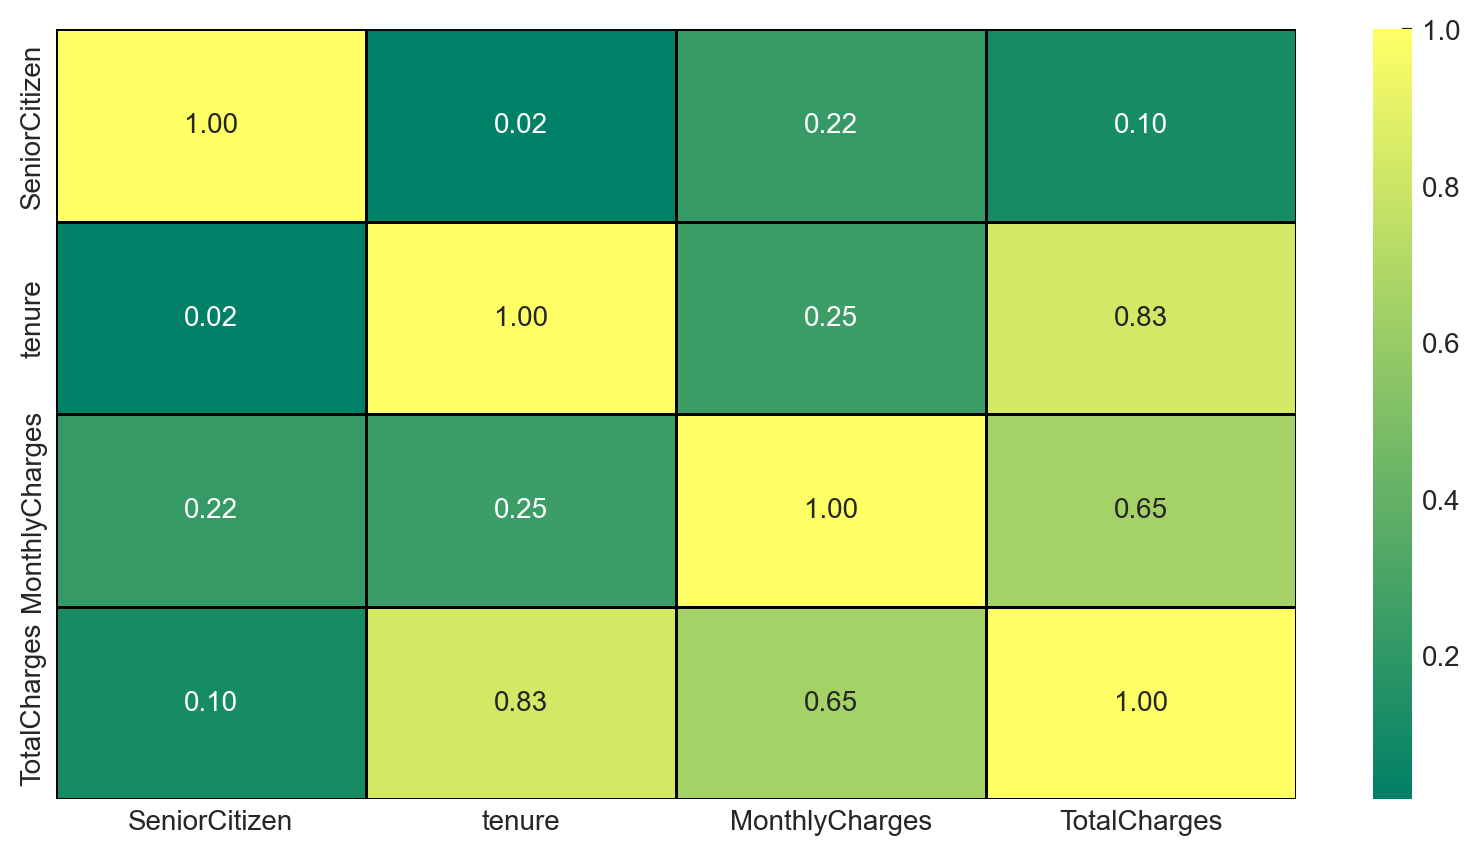

In [74]:
plt.figure(figsize=(10,5))
sns.heatmap(ch_df.corr() , annot=True, fmt = '.2f', linewidths=0.5, cmap='summer', linecolor='black');

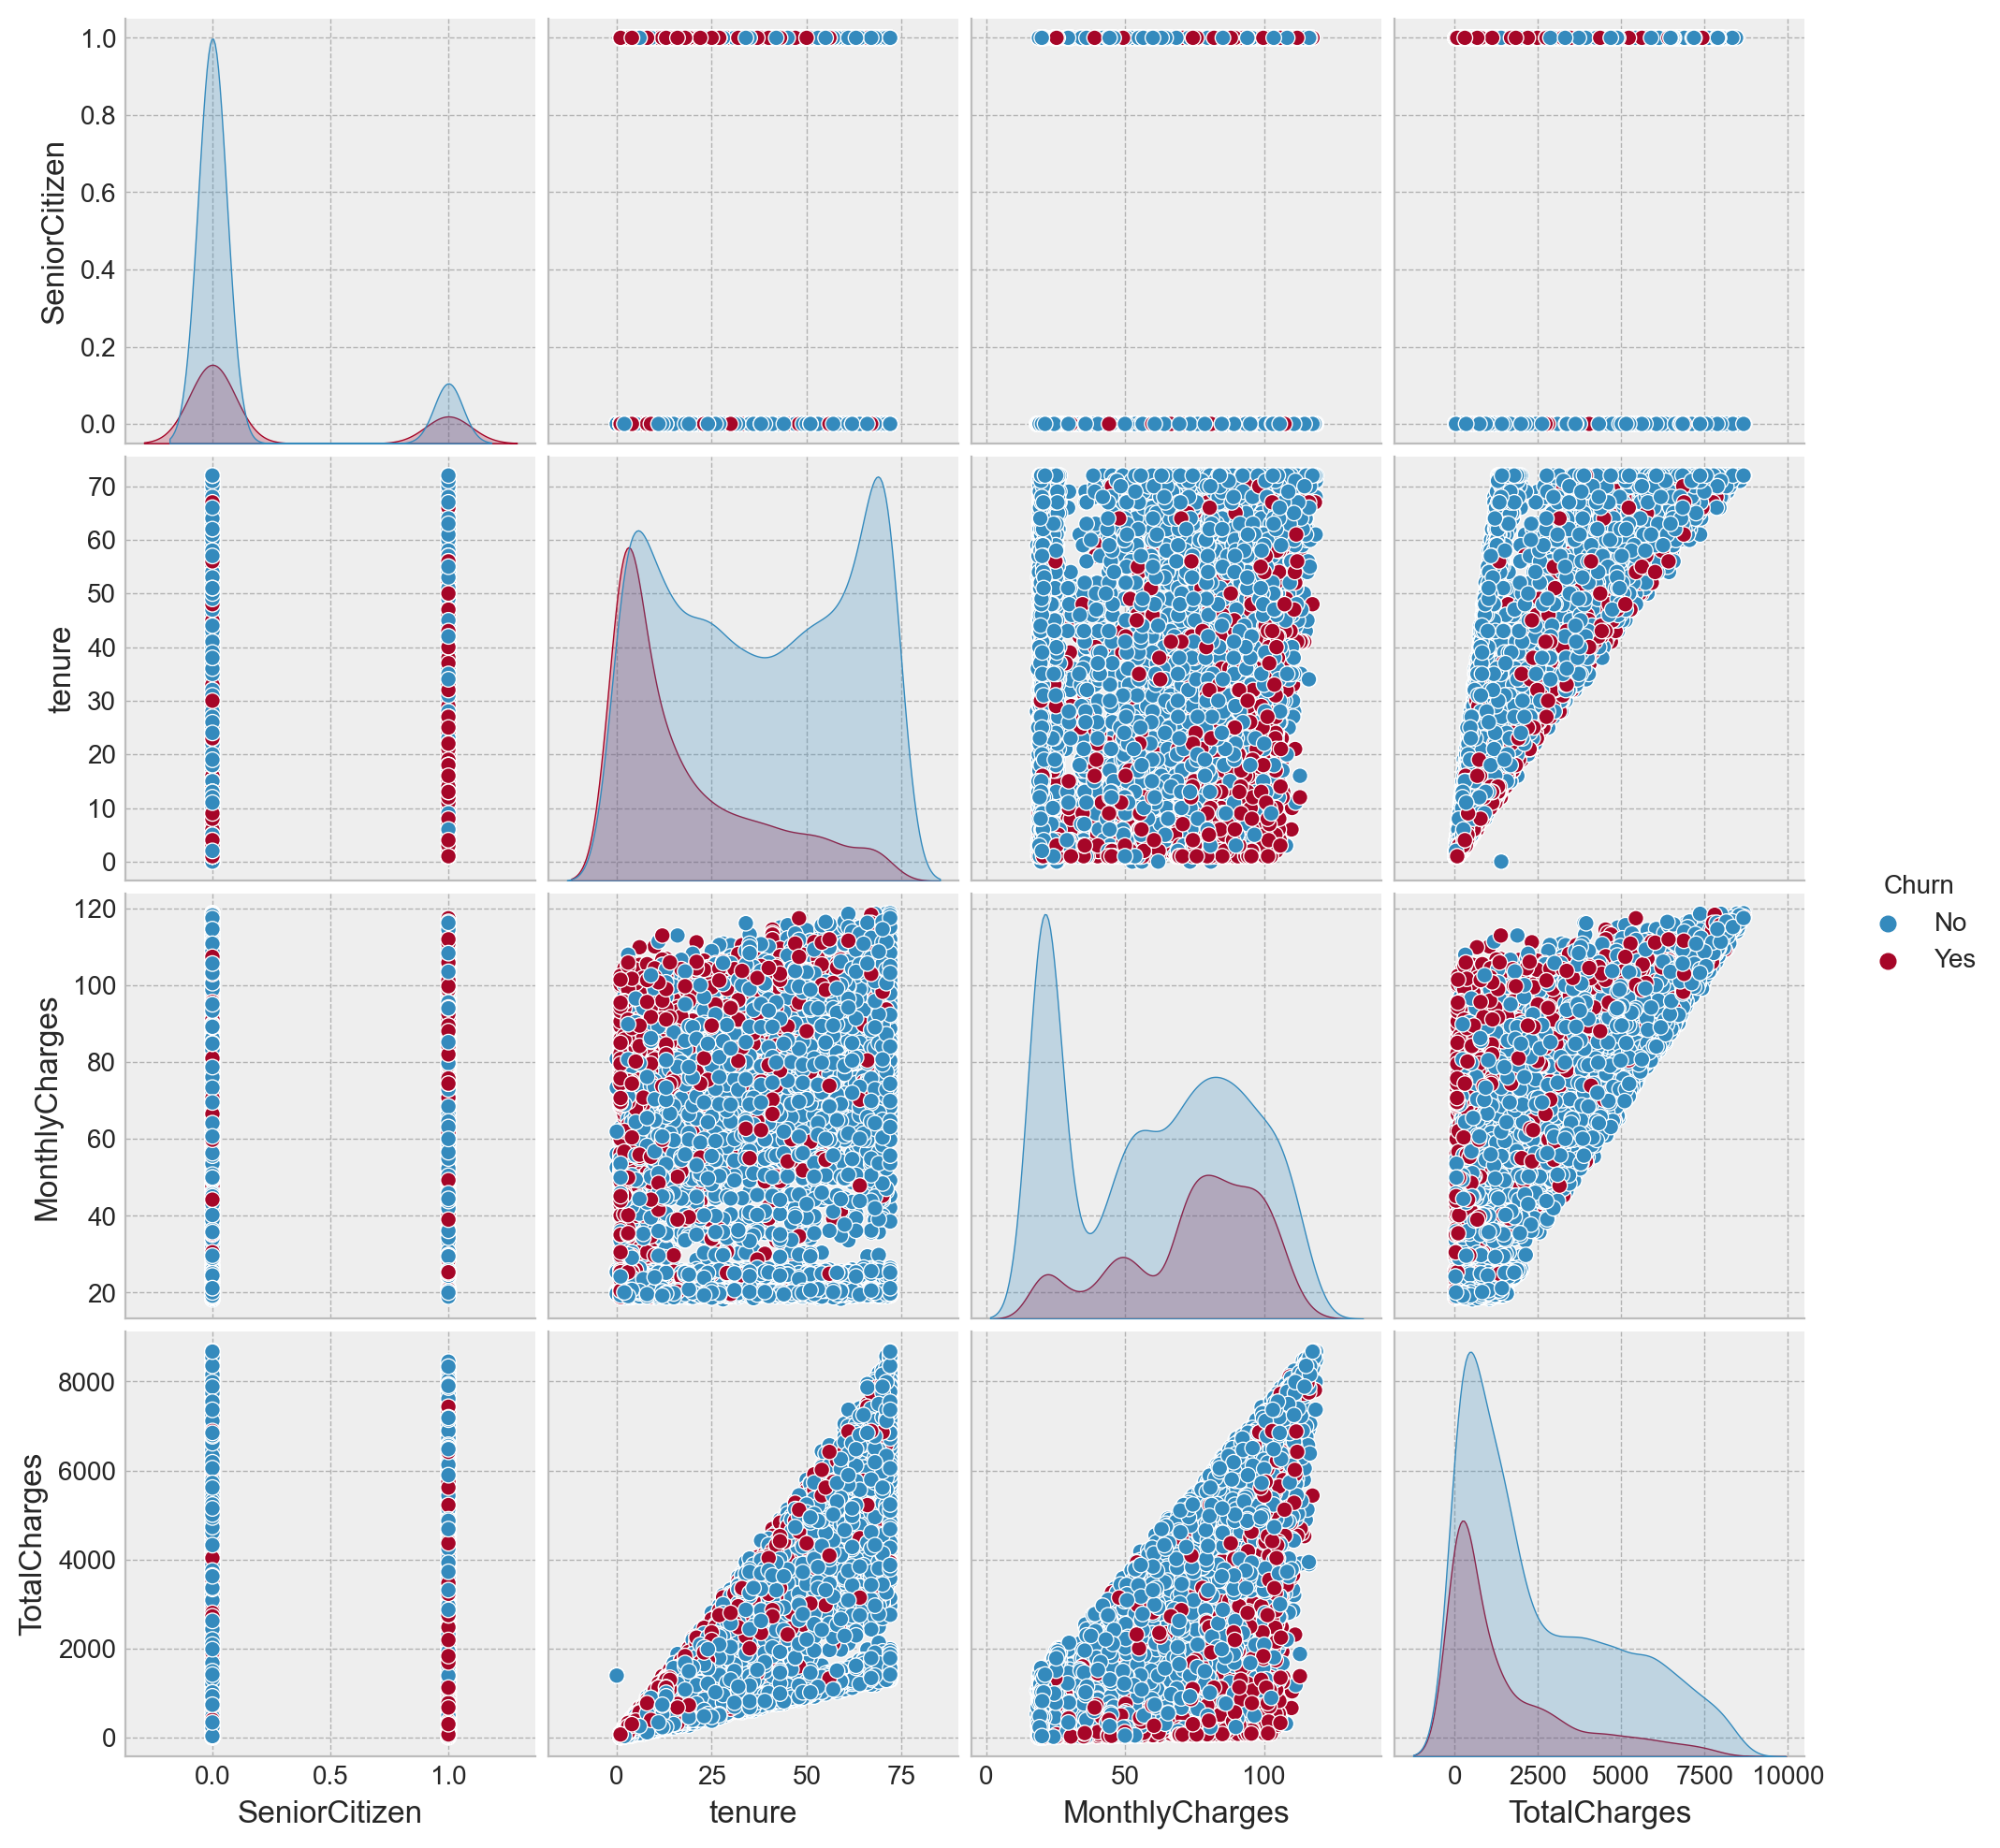

In [75]:
sns.pairplot(ch_df, hue='Churn');

### A - Identify the Target Variable and Splitting the Data into Train and Test

In [15]:
# Identifying the inputs (X) and output (y)

y = ch_df['Churn']
X =ch_df[['gender','SeniorCitizen','Partner',
          'Dependents','tenure','PhoneService','MultipleLines','InternetService',
          'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
          'Contract','PaperlessBilling','PaymentMethod','MonthlyCharges','TotalCharges']]

In [16]:
y.head()
X.head()
X.shape

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


(7043, 19)

In [17]:
# Data-preprocessing: Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 69)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(5282, 19) (5282,)
(1761, 19) (1761,)


### B. Separating Categorical and Numerical Columns:

In [18]:
X_train.head()
X_train.dtypes
X_train.MultipleLines.unique()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
4262,Male,1,No,No,2,Yes,No,DSL,Yes,No,Yes,No,Yes,No,Month-to-month,No,Bank transfer (automatic),66.40,94.55
632,Male,0,Yes,Yes,72,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),89.85,6562.90
3710,Male,0,Yes,Yes,10,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.45,242.40
3785,Male,1,Yes,No,10,Yes,Yes,Fiber optic,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,89.80,914.30
3595,Female,1,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),70.20,115.95


gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
dtype: object

array(['No', 'Yes', 'No phone service'], dtype=object)

In [19]:
# Categorical columns
X_train_cat = X_train.select_dtypes(include=['object'])

X_train_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
4262,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,Yes,No,Month-to-month,No,Bank transfer (automatic)
632,Male,Yes,Yes,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic)
3710,Male,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check
3785,Male,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check
3595,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic)


In [20]:
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])

X_train_num.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
4262,1,2,66.40,94.55
632,0,72,89.85,6562.90
3710,0,10,20.45,242.40
3785,1,10,89.80,914.30
3595,1,2,70.20,115.95


### c. Scaling the Numerical Features

In [21]:
# scaling the numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num), 
                                    columns = X_train_num.columns, 
                                    index = X_train_num.index)

X_train_num_rescaled.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
4262,2.25,-1.23,0.05,-0.96
632,-0.44,1.62,0.83,1.90
3710,-0.44,-0.91,-1.48,-0.90
3785,2.25,-0.91,0.83,-0.60
3595,2.25,-1.23,0.18,-0.95


In [22]:
X_train_num_rescaled.describe()
X_train_num.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5282.00,5282.00,5282.00,5282.00
mean,0.00,0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00
min,-0.44,-1.31,-1.55,-1.00
25%,-0.44,-0.95,-0.97,-0.83
50%,-0.44,-0.17,0.19,-0.39
75%,-0.44,0.93,0.83,0.66
max,2.25,1.62,1.79,2.83


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5282.00,5282.00,5282.00,5282.00
mean,0.16,32.25,64.81,2275.03
std,0.37,24.58,30.06,2261.92
min,0.00,0.00,18.25,18.85
25%,0.00,9.00,35.75,401.15
50%,0.00,28.00,70.40,1397.39
75%,0.00,55.00,89.80,3772.25
max,1.00,72.00,118.75,8672.45


In [23]:
print("Number of Numerical Features:", scaler.n_features_in_)
print('--'*50)
print("Mean of each column:", scaler.mean_)
print('--'*50)
print("Std of each column:", np.sqrt(scaler.var_))

Number of Numerical Features: 4
----------------------------------------------------------------------------------------------------
Mean of each column: [   0.16452101   32.24914805   64.80709958 2275.03168307]
----------------------------------------------------------------------------------------------------
Std of each column: [   0.37074769   24.57765984   30.05655563 2261.7101658 ]


### d. Applying OneHotEncoding on Categorical Columns

In [24]:
# OneHotEncoding the categorical features

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse=False)

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_cat_ohe = pd.DataFrame(encoder.fit_transform(X_train_cat), 
                               columns=encoder.get_feature_names_out(X_train_cat.columns), 
                               index = X_train_cat.index)

X_train_cat_ohe.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4262,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
632,1.00,1.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,...,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00
3710,1.00,1.00,1.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,...,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00
3785,1.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00
3595,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00


### E. Concatinating the Encoded Categorical Features and Rescaled Numerical Features:

In [25]:
X_train_transformed = pd.concat([X_train_num_rescaled, X_train_cat_ohe], axis=1)

X_train_transformed.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4262,2.25,-1.23,0.05,-0.96,1.00,0.00,0.00,1.00,0.00,0.00,...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
632,-0.44,1.62,0.83,1.90,1.00,1.00,1.00,1.00,0.00,1.00,...,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00
3710,-0.44,-0.91,-1.48,-0.90,1.00,1.00,1.00,1.00,0.00,0.00,...,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00
3785,2.25,-0.91,0.83,-0.60,1.00,1.00,0.00,1.00,0.00,1.00,...,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00
3595,2.25,-1.23,0.18,-0.95,0.00,0.00,0.00,1.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00


### F.Preparing Test Data

In [26]:
X_test_cat = X_test.select_dtypes(include=['object'])

X_test_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
5725,Female,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic)
5124,Female,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check
2462,Male,No,Yes,Yes,No,DSL,Yes,Yes,No,Yes,No,Yes,Month-to-month,Yes,Bank transfer (automatic)
1590,Female,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Electronic check
633,Male,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check


In [27]:
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

X_test_num.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
5725,0,18,24.65,471.35
5124,0,25,20.10,486.05
2462,0,1,70.45,70.45
1590,0,63,19.35,1263.85
633,0,10,20.35,176.30


In [28]:
X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns = X_test_num.columns, 
                                   index = X_test_num.index)

X_test_num_rescaled.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
5725,-0.44,-0.58,-1.34,-0.80
5124,-0.44,-0.29,-1.49,-0.79
2462,-0.44,-1.27,0.19,-0.97
1590,-0.44,1.25,-1.51,-0.45
633,-0.44,-0.91,-1.48,-0.93


In [29]:


X_test_cat_ohe = pd.DataFrame(encoder.transform(X_test_cat), 
                               columns=encoder.get_feature_names_out(X_test_cat.columns), 
                               index = X_test_cat.index)

X_test_cat_ohe.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5725,0.00,1.00,1.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,...,1.00,0.00,1.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00
5124,0.00,1.00,1.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,...,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00
2462,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00
1590,0.00,1.00,1.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,...,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00
633,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,...,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00


In [30]:
X_test_transformed = pd.concat([X_test_num_rescaled, X_test_cat_ohe], axis=1)

X_test_transformed.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5725,-0.44,-0.58,-1.34,-0.80,0.00,1.00,1.00,1.00,0.00,1.00,...,1.00,0.00,1.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00
5124,-0.44,-0.29,-1.49,-0.79,0.00,1.00,1.00,1.00,0.00,0.00,...,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00
2462,-0.44,-1.27,0.19,-0.97,1.00,0.00,1.00,1.00,0.00,0.00,...,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00
1590,-0.44,1.25,-1.51,-0.45,0.00,1.00,1.00,1.00,0.00,0.00,...,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00
633,-0.44,-0.91,-1.48,-0.93,1.00,0.00,0.00,1.00,0.00,0.00,...,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00


## Classification Algorithms

### Logistic Regression

In [31]:
classifier = LogisticRegression()
classifier.fit(X_train_transformed, y_train)

LogisticRegression()

In [32]:
y_test_pred = classifier.predict(X_test_transformed)

In [33]:
ch_LR = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

ch_LR.head()

,Actual,Predicted
5725,No,No
5124,No,No
2462,No,No
1590,No,No
633,No,No


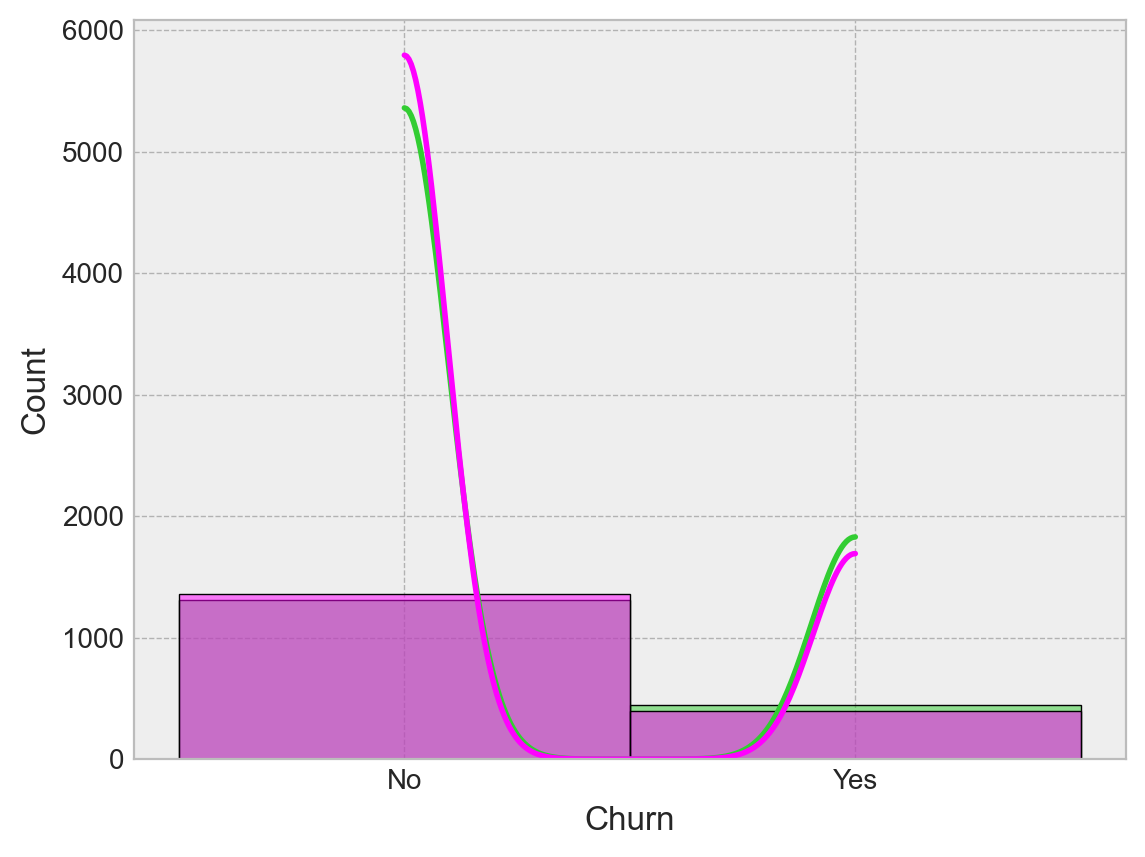

In [76]:
sns.histplot(y_test, color='limegreen', kde = True,ec='black');
sns.histplot(y_test_pred, color='magenta', kde = True,ec='black');

In [34]:
A = metrics.accuracy_score(y_test, y_test_pred)

In [35]:
print('Accuracy:', metrics.accuracy_score(y_test, y_test_pred))

Accuracy: 0.8143100511073254


### KNN Classifier

In [36]:
classifier = KNeighborsClassifier()
classifier.fit(X_train_transformed, y_train)

KNeighborsClassifier()

In [37]:
y_test_pred = classifier.predict(X_test_transformed)

In [38]:
churn_KNN = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

churn_KNN.head()

,Actual,Predicted
5725,No,No
5124,No,No
2462,No,No
1590,No,No
633,No,No


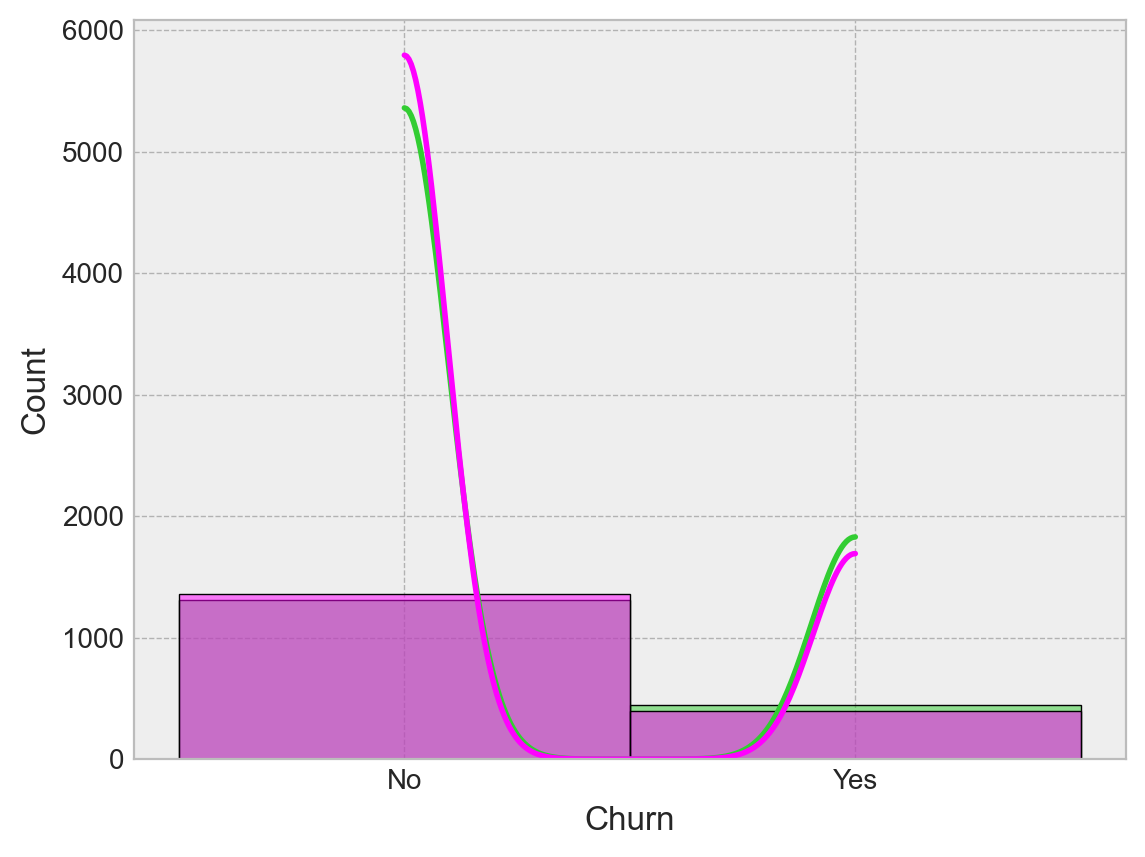

In [77]:
sns.histplot(y_test, color='limegreen', kde = True,ec='black');
sns.histplot(y_test_pred, color='magenta', kde = True,ec='black');

In [39]:
B = metrics.accuracy_score(y_test, y_test_pred)

In [40]:
print('Accuracy:', metrics.accuracy_score(y_test, y_test_pred))

Accuracy: 0.7575241340147644


### Support Vector Classifier

In [41]:
classifier = SVC()
classifier.fit(X_train_transformed, y_train)

SVC()

In [42]:
y_test_pred = classifier.predict(X_test_transformed)

In [43]:
ch_SVC = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

ch_SVC.head()

,Actual,Predicted
5725,No,No
5124,No,No
2462,No,No
1590,No,No
633,No,No


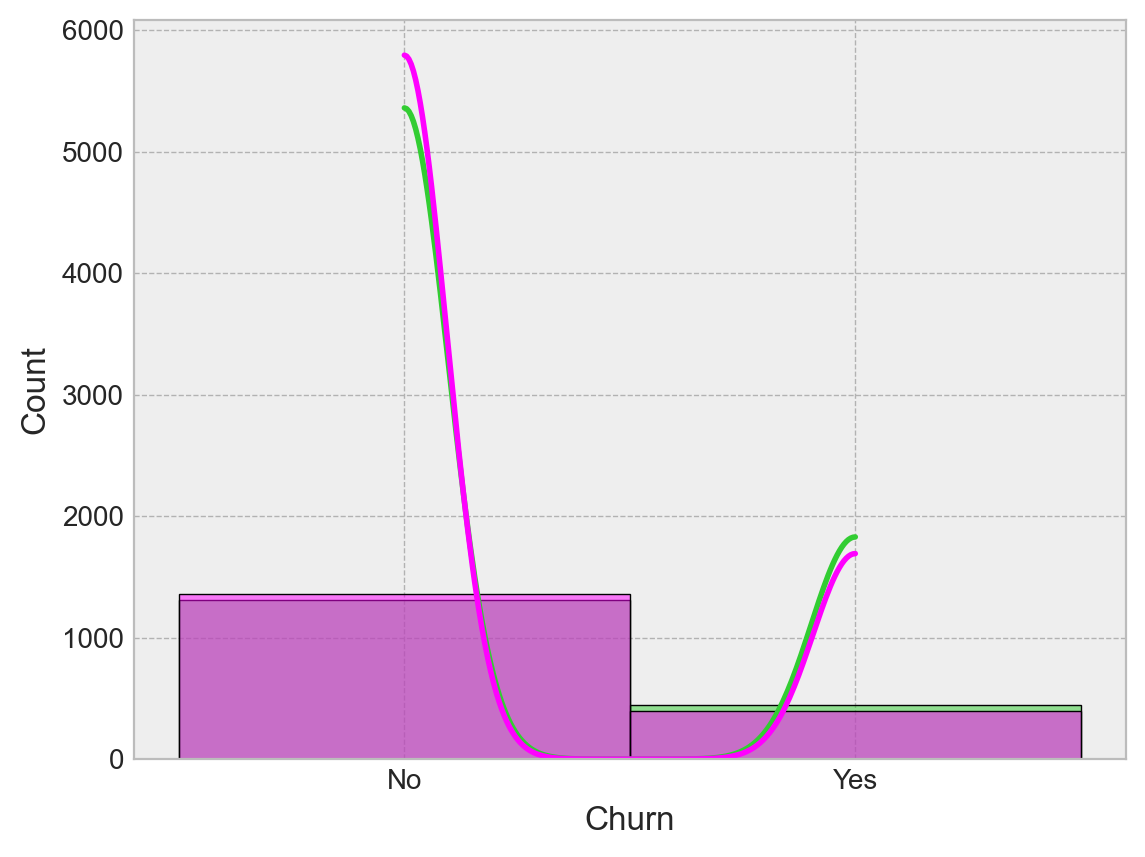

In [78]:
sns.histplot(y_test, color='limegreen', kde = True,ec='black');
sns.histplot(y_test_pred, color='magenta', kde = True,ec='black');

In [44]:
C = metrics.accuracy_score(y_test, y_test_pred)
print('Accuracy:', metrics.accuracy_score(y_test, y_test_pred))

Accuracy: 0.8126064735945485


### Decision Tree Classifier

In [45]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train_transformed, y_train)

DecisionTreeClassifier()

In [46]:
y_test_pred = classifier.predict(X_test_transformed)

In [47]:
churn_DT = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

churn_DT.head()

,Actual,Predicted
5725,No,No
5124,No,No
2462,No,No
1590,No,No
633,No,No


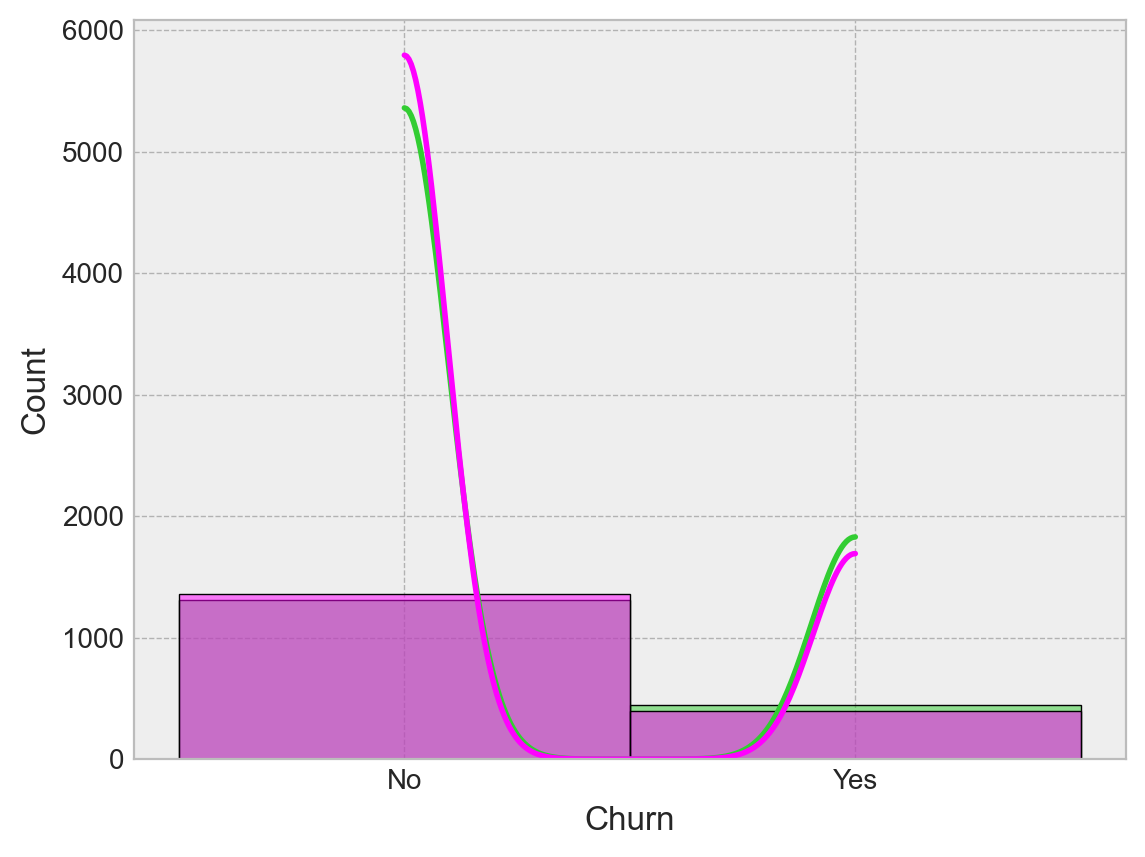

In [79]:
sns.histplot(y_test, color='limegreen', kde = True,ec='black');
sns.histplot(y_test_pred, color='magenta', kde = True,ec='black');

In [48]:
D = metrics.accuracy_score(y_test, y_test_pred)
print('Accuracy:', metrics.accuracy_score(y_test, y_test_pred))

Accuracy: 0.7331061896649631


### Random Forest Classifier

In [49]:
classifier = RandomForestClassifier()
classifier.fit(X_train_transformed, y_train)

RandomForestClassifier()

In [50]:
y_test_pred = classifier.predict(X_test_transformed)

In [51]:
ch_RF = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

ch_RF.head()

,Actual,Predicted
5725,No,No
5124,No,No
2462,No,No
1590,No,No
633,No,No


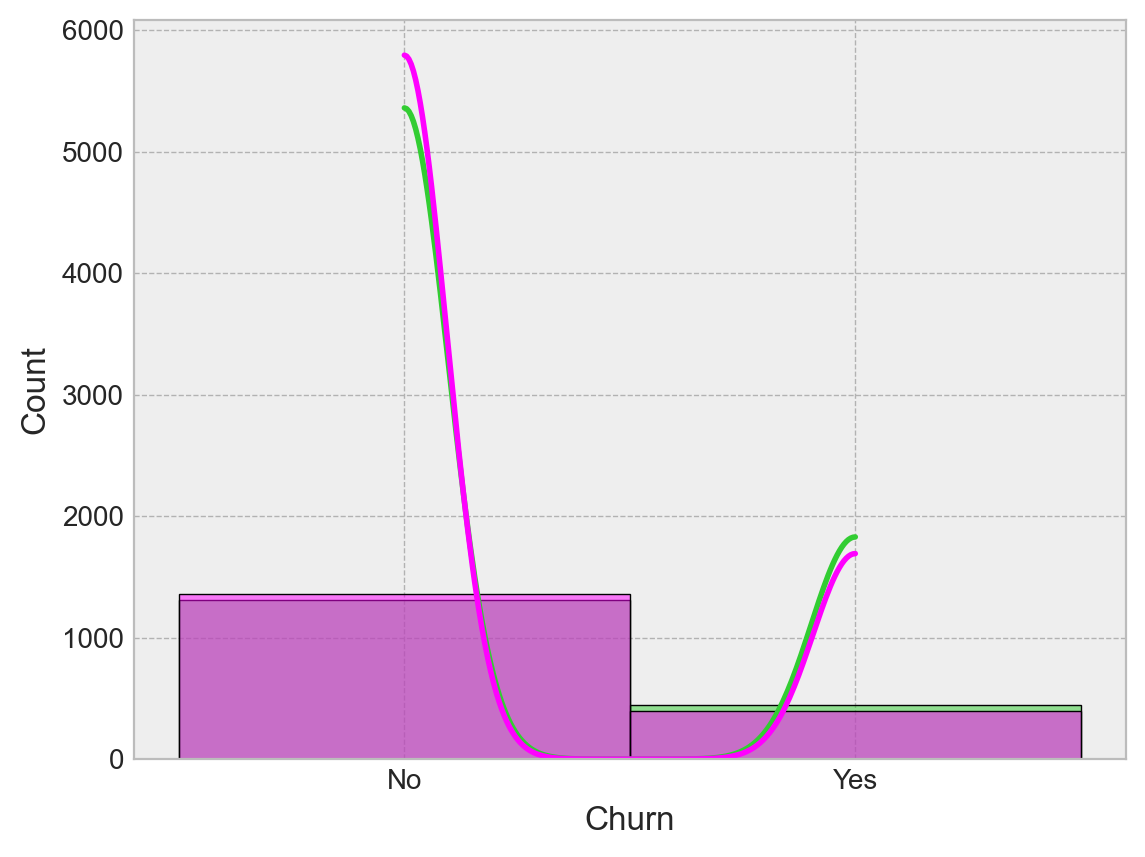

In [80]:
sns.histplot(y_test, color='limegreen', kde = True,ec='black');
sns.histplot(y_test_pred, color='magenta', kde = True,ec='black');

In [52]:
E = metrics.accuracy_score(y_test, y_test_pred)
print('Accuracy:', metrics.accuracy_score(y_test, y_test_pred))

Accuracy: 0.7915956842703009


### Gradient Boosting Classifier

In [53]:
classifier = GradientBoostingClassifier()
classifier.fit(X_train_transformed, y_train)

GradientBoostingClassifier()

In [54]:
y_test_pred = classifier.predict(X_test_transformed)

In [55]:
ch_GB = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

ch_GB.head()

,Actual,Predicted
5725,No,No
5124,No,No
2462,No,Yes
1590,No,No
633,No,No


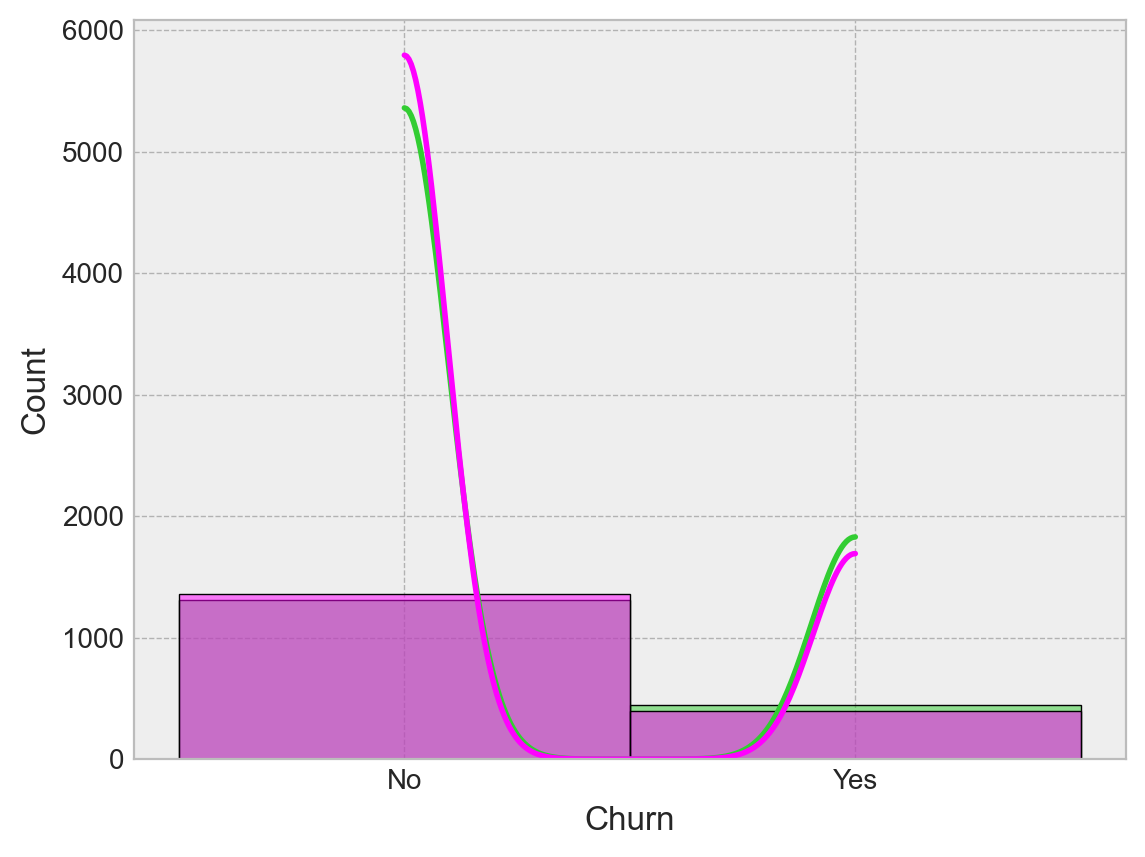

In [81]:
sns.histplot(y_test, color='limegreen', kde = True,ec='black');
sns.histplot(y_test_pred, color='magenta', kde = True,ec='black');

In [56]:
F = metrics.accuracy_score(y_test, y_test_pred)
print('Accuracy:', metrics.accuracy_score(y_test, y_test_pred))

Accuracy: 0.8120386144236229


### AdaBoostClassifier

In [57]:
classifier = AdaBoostClassifier()
classifier.fit(X_train_transformed, y_train)

AdaBoostClassifier()

In [58]:
y_test_pred = classifier.predict(X_test_transformed)

In [59]:
ch_ADB = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

ch_ADB.head()

,Actual,Predicted
5725,No,No
5124,No,No
2462,No,No
1590,No,No
633,No,No


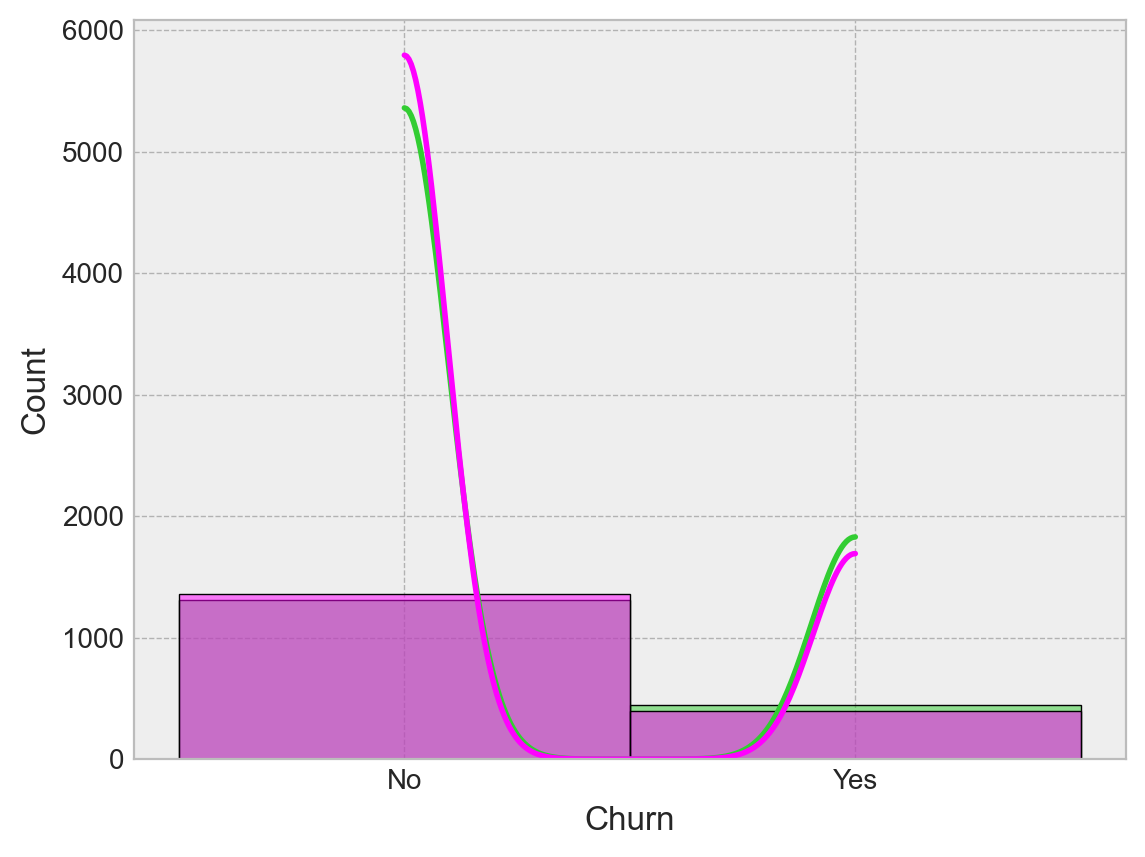

In [85]:
sns.histplot(y_test, color='limegreen', kde = True,ec='black');
sns.histplot(y_test_pred, color='magenta', kde = True,ec='black');

In [60]:
G = metrics.accuracy_score(y_test, y_test_pred)
print('Accuracy:', metrics.accuracy_score(y_test, y_test_pred))

Accuracy: 0.8080636002271436


In [61]:
 Churn_default = {"Algorithm": ["LogisticRegression", " KNeighborsClassifier",'SV Classifier', " DT Classifier", "Random Forest Classifier", "Gradient-Boosting Classifier",'AdaBoostClassifier'],
           "Classification": ["Logit", "K-Nearest",'Support Vector', "Decision-Tree", "Ensemble", "Boosting","Boosting"],
           "Accuracy": [A,B,C,D,E,F,G],
           "Percentage": [81.4,75.7,81.2,72.4,79.6,81.2,80.8]}

In [62]:
Churn_final = pd.DataFrame(Churn_default)

In [63]:
Churn_final

,Algorithm,Classification,Accuracy,Percentage
0,LogisticRegression,Logit,0.81,81.40
1,KNeighborsClassifier,K-Nearest,0.76,75.70
2,SV Classifier,Support Vector,0.81,81.20
3,DT Classifier,Decision-Tree,0.73,72.40
4,Random Forest Classifier,Ensemble,0.79,79.60
5,Gradient-Boosting Classifier,Boosting,0.81,81.20
6,AdaBoostClassifier,Boosting,0.81,80.80


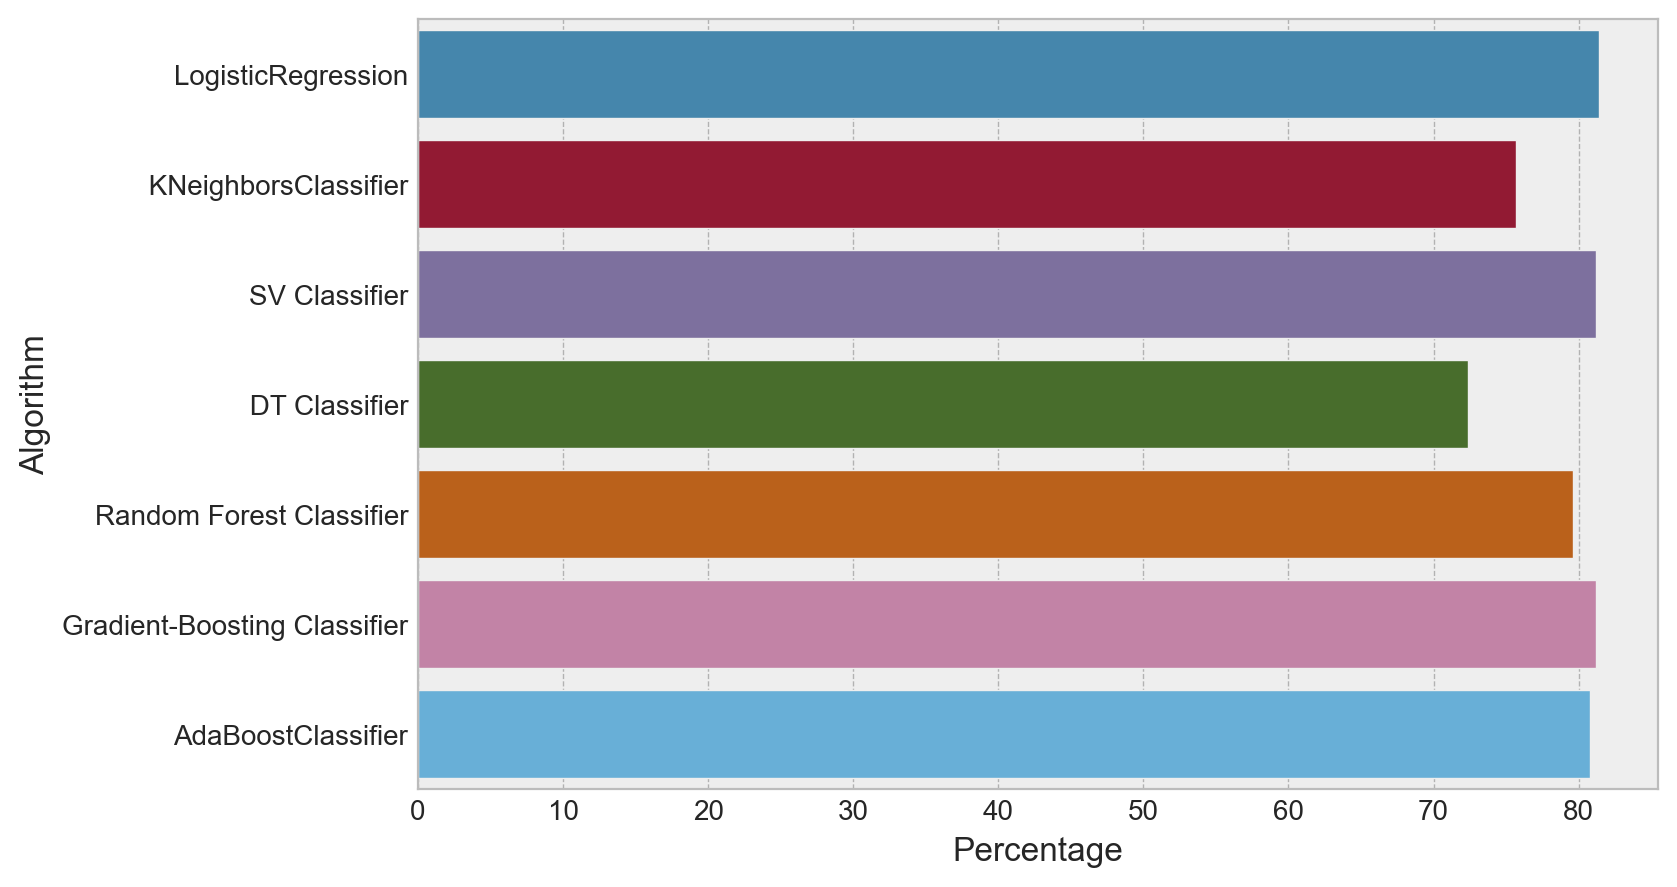

In [64]:
plt.figure(figsize=(8,5))
sns.barplot( x = 'Percentage',y ='Algorithm' , data = Churn_final,orient ='h');

*  The results of the evaluation using `Accuracy` as the metric show that **`LogisticRegression`** outperformed the other models, with a score of **81.4**

`GB & SVC` had the second-best performance, with a score of **81.2**


####  These results suggest that **`LogisticRegression`** may be the most effective model for this particular task, 
      Although further evaluation and validation is necessary to confirm this conclusion.